In [11]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('../data/data_ex_2.csv')

In [4]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<AxesSubplot:ylabel='Frequency'>

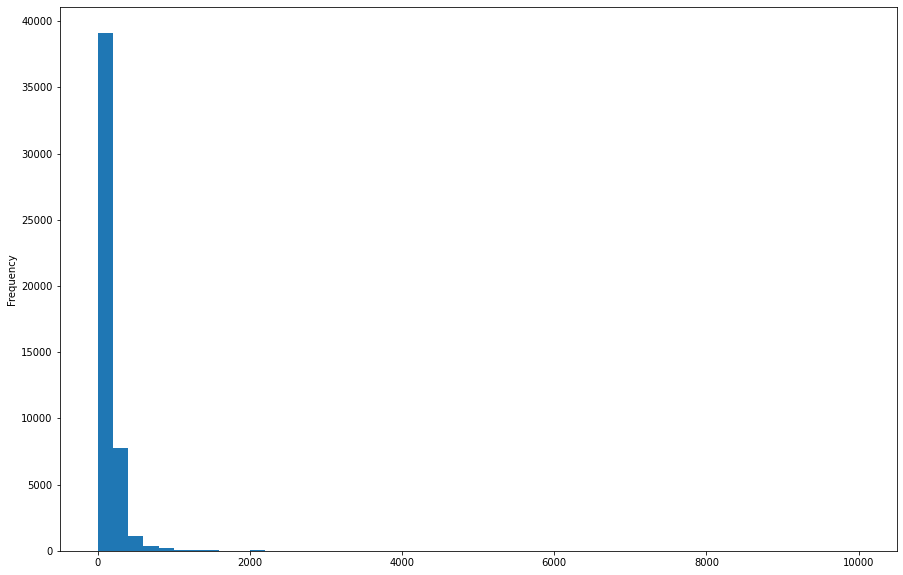

In [7]:
data['price'].plot.hist(figsize=(15,10), bins=50)

In [8]:
data = data[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
             'calculated_host_listings_count', 'availability_365']]

# Question 1

In [9]:
data.isna().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

column with missing values: reviews_per_month 

# Question 2

In [10]:
data['minimum_nights'].median()

3.0

In [47]:
np.random.seed(42)
idx = np.random.permutation(data.index.values)

In [48]:
data.iloc[idx].head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38461,40.80317,-73.96338,50,20,0,NaN,1,0
40490,40.77506,-73.95335,80,1,1,0.06,1,170
46939,40.72468,-73.94042,200,2,1,1.00,1,0
45969,40.83591,-73.94586,180,5,0,NaN,1,83
16928,40.68803,-73.99182,150,1,19,0.28,1,0


In [49]:
train_idx = int(len(idx) * 0.6)
val_idx = int(len(idx) * 0.8)

In [52]:
X_train = data.iloc[idx[:train_idx]]
X_val = data.iloc[idx[train_idx:val_idx]]
X_test = data.iloc[idx[val_idx:]]

In [53]:
y_train = np.log1p(X_train.pop('price'))
y_val = np.log1p(X_val.pop('price'))
y_test = np.log1p(X_test.pop('price'))

In [107]:
# as in lecture
n = len(data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = data.iloc[idx[:n_train]]
df_val = data.iloc[idx[n_train:n_train+n_val]]
df_test = data.iloc[idx[n_train+n_val:]]

y_train = np.log1p(df_train.pop('price'))
y_val = np.log1p(df_val.pop('price'))
y_test = np.log1p(df_test.pop('price'))

In [111]:
df_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
7642,40.64354,-73.97777,3,62,0.71,1,189
30129,40.70666,-73.90779,21,0,NaN,1,73
44288,40.76116,-73.99016,2,17,0.43,1,0
43502,40.70763,-74.01050,2,5,1.88,327,272
3518,40.79658,-73.93287,2,30,0.80,1,30


# Question 3

In [55]:
X_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38461,40.80317,-73.96338,20,0,NaN,1,0
40490,40.77506,-73.95335,1,1,0.06,1,170
46939,40.72468,-73.94042,2,1,1.00,1,0
45969,40.83591,-73.94586,5,0,NaN,1,83
16928,40.68803,-73.99182,1,19,0.28,1,0


In [56]:
mean_reviews_per_month = X_train['reviews_per_month'].mean()

In [57]:
def prepare_X(df, fill_value=0):
    df = df.copy()
    
    df = df.fillna(fill_value)
        
    X = df.values
    return X

In [58]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [59]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [72]:
def eval_model(X_val, y_val, w, w0, fill_value):
    X = prepare_X(X_val, fill_value)
    y_pred = w0 + X.dot(w)
    return rmse(y_val, y_pred)

In [73]:
X = prepare_X(X_train, mean_reviews_per_month)
w0, w = train_linear_regression(X, y_train)

eval_model(X_val, y_val, w, w0, mean_reviews_per_month)

0.6480364067538715

In [74]:
X = prepare_X(X_train, 0)
w0, w = train_linear_regression(X, y_train)

eval_model(X_val, y_val, w, w0, 0)

0.6481479685345387

In [113]:
# as in lecture
X = prepare_X(df_train, mean_reviews_per_month)
w0, w = train_linear_regression(X, y_train)

eval_model(df_val, y_val, w, w0, mean_reviews_per_month)

0.6427547486307802

In [114]:
# as in lecture
X = prepare_X(df_train, 0)
w0, w = train_linear_regression(X, y_train)

eval_model(df_val, y_val, w, w0, 0)

0.6430337788516728

# Question 4

In [75]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [76]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X = prepare_X(X_train, 0)
    w0, w = train_linear_regression_reg(X, y_train, r=r)

    score = eval_model(X_val, y_val, w, w0, 0)
    
    print(r, '\t', round(score, 2))

0 	 0.65
1e-06 	 0.65
0.0001 	 0.65
0.001 	 0.65
0.01 	 0.66
0.1 	 0.68
1 	 0.69
5 	 0.69
10 	 0.69


In [120]:
# as in lecture
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X, y_train, r=r)

    score = eval_model(df_val, y_val, w, w0, 0)
    
    print(r, '\t', round(score, 5))

0 	 0.69207
1e-06 	 0.69207
0.0001 	 0.69207
0.001 	 0.69208
0.01 	 0.69209
0.1 	 0.69211
1 	 0.69211
5 	 0.69211
10 	 0.69211


# Question 5

In [83]:
def split_data(data, seed):
    np.random.seed(seed)
    idx = np.random.permutation(data.index.values)
    
    X_train = data.iloc[idx[:train_idx]]
    X_val = data.iloc[idx[train_idx:val_idx]]
    X_test = data.iloc[idx[val_idx:]]
    
    y_train = np.log1p(X_train.pop('price'))
    y_val = np.log1p(X_val.pop('price'))
    y_test = np.log1p(X_test.pop('price'))
    return X_train, X_val, X_test, y_train, y_val, y_test
    

In [85]:
scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(data, seed)
    
    print(X_train.head(1).index)
    X = prepare_X(X_train, 0)
    w0, w = train_linear_regression_reg(X, y_train, r=0)

    score = eval_model(X_val, y_val, w, w0, 0)
    scores.append(score)
    
    print(seed, '\t', round(score, 3))

Int64Index([47436], dtype='int64')
0 	 0.641
Int64Index([19157], dtype='int64')
1 	 0.653
Int64Index([21453], dtype='int64')
2 	 0.642
Int64Index([10594], dtype='int64')
3 	 0.651
Int64Index([14300], dtype='int64')
4 	 0.647
Int64Index([45776], dtype='int64')
5 	 0.657
Int64Index([1966], dtype='int64')
6 	 0.645
Int64Index([17126], dtype='int64')
7 	 0.645
Int64Index([6694], dtype='int64')
8 	 0.647
Int64Index([25499], dtype='int64')
9 	 0.653


In [87]:
round(np.std(scores), 3)

0.005

In [118]:
# as in lecture
def split_data(data, seed):
    np.random.seed(seed)
    n = len(data)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = data.iloc[idx[:n_train]]
    df_val = data.iloc[idx[n_train:n_train+n_val]]
    df_test = data.iloc[idx[n_train+n_val:]]

    y_train = np.log1p(df_train.pop('price'))
    y_val = np.log1p(df_val.pop('price'))
    y_test = np.log1p(df_test.pop('price'))
    return X_train, X_val, X_test, y_train, y_val, y_test

scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(data, seed)
    
    print(X_train.head(1).index)
    X = prepare_X(X_train, 0)
    w0, w = train_linear_regression_reg(X, y_train, r=0)

    score = eval_model(X_val, y_val, w, w0, 0)
    scores.append(score)
    
    print(seed, '\t', round(score, 3))

round(np.std(scores), 3)

Int64Index([25499], dtype='int64')
0 	 0.703
Int64Index([25499], dtype='int64')
1 	 0.697
Int64Index([25499], dtype='int64')
2 	 0.692
Int64Index([25499], dtype='int64')
3 	 0.687
Int64Index([25499], dtype='int64')
4 	 0.695
Int64Index([25499], dtype='int64')
5 	 0.681
Int64Index([25499], dtype='int64')
6 	 0.68
Int64Index([25499], dtype='int64')
7 	 0.701
Int64Index([25499], dtype='int64')
8 	 0.7
Int64Index([25499], dtype='int64')
9 	 0.692


0.008

# Question 6

In [88]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data, 9)

X = prepare_X(pd.concat([X_train, X_val]), 0)
w0, w = train_linear_regression_reg(X, pd.concat([y_train, y_val]), r=0.001)

score = eval_model(X_test, y_test, w, w0, 0)

score

0.636551784697298

In [119]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(data, 9)

X = prepare_X(pd.concat([X_train, X_val]), 0)
w0, w = train_linear_regression_reg(X, pd.concat([y_train, y_val]), r=0.001)

score = eval_model(X_test, y_test, w, w0, 0)

score

0.6980261452707163